In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import build_opener
from urllib.request import install_opener
import os
import pathlib
from os import listdir
from os.path import isfile, join

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
for physical_device in physical_devices: 
    tf.config.experimental.set_memory_growth(physical_device, True)

In [3]:
print(tf.__version__)

2.2.0


In [4]:
# Is jupyter notebook using GPU
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# count how many images in each category

In [5]:
folder_name_list = ['001_Bulbasaur', '002_Ivysaur', '003_Venusaur', '004_Charmander', '005_Charmeleon',
 '006_Charizard', '007_Squirtle', '008_Wartortle', '009_Blastoise', '010_Caterpie', '011_Metapod',
 '012_Butterfree', '013_Weedle', '014_Kakuna', '015_Beedrill', '016_Pidgey', '017_Pidgeotto', '018_Pidgeot',
 '019_Rattata', '020_Raticate', '021_Spearow', '022_Fearow', '023_Ekans', '024_Arbok', '025_Pikachu', '026_Raichu',
 '027_Sandshrew', '028_Sandslash', '029_Nidoran♀', '030_Nidorina', '031_Nidoqueen', '032_Nidoran♂', '033_Nidorino',
 '034_Nidoking', '035_Clefairy', '036_Clefable', '037_Vulpix', '038_Ninetales', '039_Jigglypuff', '040_Wigglytuff',
 '041_Zubat', '042_Golbat', '043_Oddish', '044_Gloom', '045_Vileplume', '046_Paras', '047_Parasect', '048_Venonat',
 '049_Venomoth', '050_Diglett', '051_Dugtrio', '052_Meowth', '053_Persian', '054_Psyduck', '055_Golduck', '056_Mankey',
 '057_Primeape', '058_Growlithe', '059_Arcanine', '060_Poliwag', '061_Poliwhirl', '062_Poliwrath', '063_Abra',
 '064_Kadabra', '065_Alakazam', '066_Machop', '067_Machoke', '068_Machamp', '069_Bellsprout', '070_Weepinbell',
 '071_Victreebel', '072_Tentacool', '073_Tentacruel', '074_Geodude', '075_Graveler', '076_Golem', '077_Ponyta',
 '078_Rapidash', '079_Slowpoke', '080_Slowbro', '081_Magnemite', '082_Magneton', "083_Farfetch'd", '084_Doduo',
 '085_Dodrio', '086_Seel', '087_Dewgong', '088_Grimer', '089_Muk', '090_Shellder', '091_Cloyster', '092_Gastly',
 '093_Haunter', '094_Gengar', '095_Onix', '096_Drowzee', '097_Hypno', '098_Krabby', '099_Kingler', '100_Voltorb',
 '101_Electrode', '102_Exeggcute', '103_Exeggutor', '104_Cubone', '105_Marowak', '106_Hitmonlee', '107_Hitmonchan',
 '108_Lickitung', '109_Koffing', '110_Weezing', '111_Rhyhorn', '112_Rhydon', '113_Chansey', '114_Tangela',
 '115_Kangaskhan', '116_Horsea', '117_Seadra', '118_Goldeen', '119_Seaking', '120_Staryu', '121_Starmie',
 '122_Mr. Mime', '123_Scyther', '124_Jynx', '125_Electabuzz', '126_Magmar', '127_Pinsir', '128_Tauros',
 '129_Magikarp', '130_Gyarados', '131_Lapras', '132_Ditto', '133_Eevee', '134_Vaporeon', '135_Jolteon',
 '136_Flareon', '137_Porygon', '138_Omanyte', '139_Omastar', '140_Kabuto', '141_Kabutops', '142_Aerodactyl',
 '143_Snorlax', '144_Articuno', '145_Zapdos', '146_Moltres', '147_Dratini', '148_Dragonair', '149_Dragonite',
 '150_Mewtwo', '151_Mew', '152_Chikorita', '153_Bayleef', '154_Meganium', '155_Cyndaquil', '156_Quilava', '157_Typhlosion',
 '158_Totodile', '159_Croconaw', '160_Feraligatr', '161_Sentret', '162_Furret', '163_Hoothoot', '164_Noctowl',
 '165_Ledyba', '166_Ledian', '167_Spinarak', '168_Ariados', '169_Crobat', '170_Chinchou', '171_Lanturn', '172_Pichu',
 '173_Cleffa', '174_Igglybuff', '175_Togepi', '176_Togetic', '177_Natu', '178_Xatu', '179_Mareep', '180_Flaaffy',
 '181_Ampharos', '182_Bellossom', '183_Marill', '184_Azumarill', '185_Sudowoodo', '186_Politoed', '187_Hoppip',
 '188_Skiploom', '189_Jumpluff', '190_Aipom', '191_Sunkern', '192_Sunflora', '193_Yanma', '194_Wooper', '195_Quagsire',
 '196_Espeon', '197_Umbreon', '198_Murkrow', '199_Slowking', '200_Misdreavus', '201_Unown', '202_Wobbuffet', '203_Girafarig',
 '204_Pineco', '205_Forretress', '206_Dunsparce', '207_Gligar', '208_Steelix', '209_Snubbull', '210_Granbull',
 '211_Qwilfish', '212_Scizor', '213_Shuckle', '214_Heracross', '215_Sneasel', '216_Teddiursa', '217_Ursaring',
 '218_Slugma', '219_Magcargo', '220_Swinub', '221_Piloswine', '222_Corsola', '223_Remoraid', '224_Octillery',
 '225_Delibird', '226_Mantine', '227_Skarmory', '228_Houndour', '229_Houndoom', '230_Kingdra', '231_Phanpy',
 '232_Donphan', '233_Porygon2', '234_Stantler', '235_Smeargle', '236_Tyrogue', '237_Hitmontop', '238_Smoochum',
 '239_Elekid', '240_Magby', '241_Miltank', '242_Blissey', '243_Raikou', '244_Entei', '245_Suicune', '246_Larvitar',
 '247_Pupitar', '248_Tyranitar', '249_Lugia', '250_Ho-Oh', '251_Celebi', '252_Treecko', '253_Grovyle', '254_Sceptile',
 '255_Torchic', '256_Combusken', '257_Blaziken', '258_Mudkip', '259_Marshtomp', '260_Swampert', '261_Poochyena',
 '262_Mightyena', '263_Zigzagoon', '264_Linoone', '265_Wurmple', '266_Silcoon', '267_Beautifly', '268_Cascoon',
 '269_Dustox', '270_Lotad', '271_Lombre', '272_Ludicolo', '273_Seedot', '274_Nuzleaf', '275_Shiftry', '276_Taillow',
 '277_Swellow', '278_Wingull', '279_Pelipper', '280_Ralts', '281_Kirlia', '282_Gardevoir', '283_Surskit', '284_Masquerain',
 '285_Shroomish', '286_Breloom', '287_Slakoth', '288_Vigoroth', '289_Slaking', '290_Nincada', '291_Ninjask',
 '292_Shedinja', '293_Whismur', '294_Loudred', '295_Exploud', '296_Makuhita', '297_Hariyama', '298_Azurill',
 '299_Nosepass', '300_Skitty', '301_Delcatty', '302_Sableye', '303_Mawile', '304_Aron', '305_Lairon', '306_Aggron',
 '307_Meditite', '308_Medicham', '309_Electrike', '310_Manectric', '311_Plusle', '312_Minun', '313_Volbeat',
 '314_Illumise', '315_Roselia', '316_Gulpin', '317_Swalot', '318_Carvanha', '319_Sharpedo', '320_Wailmer',
 '321_Wailord', '322_Numel', '323_Camerupt', '324_Torkoal', '325_Spoink', '326_Grumpig', '327_Spinda',
 '328_Trapinch', '329_Vibrava', '330_Flygon', '331_Cacnea', '332_Cacturne', '333_Swablu', '334_Altaria', '335_Zangoose',
 '336_Seviper', '337_Lunatone', '338_Solrock', '339_Barboach', '340_Whiscash', '341_Corphish', '342_Crawdaunt',
 '343_Baltoy', '344_Claydol', '345_Lileep', '346_Cradily', '347_Anorith', '348_Armaldo', '349_Feebas', '350_Milotic',
 '351_Castform', '352_Kecleon', '353_Shuppet', '354_Banette', '355_Duskull', '356_Dusclops', '357_Tropius', '358_Chimecho',
 '359_Absol', '360_Wynaut', '361_Snorunt', '362_Glalie', '363_Spheal', '364_Sealeo', '365_Walrein', '366_Clamperl',
 '367_Huntail', '368_Gorebyss', '369_Relicanth', '370_Luvdisc', '371_Bagon', '372_Shelgon', '373_Salamence', '374_Beldum',
 '375_Metang', '376_Metagross', '377_Regirock', '378_Regice', '379_Registeel', '380_Latias', '381_Latios', '382_Kyogre',
 '383_Groudon', '384_Rayquaza', '385_Jirachi', '386_Deoxys', '387_Turtwig', '388_Grotle', '389_Torterra', '390_Chimchar',
 '391_Monferno', '392_Infernape', '393_Piplup', '394_Prinplup', '395_Empoleon', '396_Starly', '397_Staravia', '398_Staraptor',
 '399_Bidoof', '400_Bibarel', '401_Kricketot', '402_Kricketune', '403_Shinx', '404_Luxio', '405_Luxray',
 '406_Budew', '407_Roserade', '408_Cranidos', '409_Rampardos', '410_Shieldon', '411_Bastiodon', '412_Burmy', '413_Wormadam',
 '414_Mothim', '415_Combee', '416_Vespiquen', '417_Pachirisu', '418_Buizel', '419_Floatzel', '420_Cherubi', '421_Cherrim',
 '422_Shellos', '423_Gastrodon', '424_Ambipom', '425_Drifloon', '426_Drifblim', '427_Buneary', '428_Lopunny',
 '429_Mismagius', '430_Honchkrow', '431_Glameow', '432_Purugly', '433_Chingling', '434_Stunky', '435_Skuntank',
 '436_Bronzor', '437_Bronzong', '438_Bonsly', '439_Mime Jr.', '440_Happiny', '441_Chatot', '442_Spiritomb', '443_Gible',
 '444_Gabite', '445_Garchomp', '446_Munchlax', '447_Riolu', '448_Lucario', '449_Hippopotas', '450_Hippowdon', '451_Skorupi',
 '452_Drapion', '453_Croagunk', '454_Toxicroak', '455_Carnivine', '456_Finneon', '457_Lumineon', '458_Mantyke',
 '459_Snover', '460_Abomasnow', '461_Weavile', '462_Magnezone', '463_Lickilicky', '464_Rhyperior', '465_Tangrowth',
 '466_Electivire', '467_Magmortar', '468_Togekiss', '469_Yanmega', '470_Leafeon', '471_Glaceon', '472_Gliscor', '473_Mamoswine',
 '474_Porygon-Z', '475_Gallade', '476_Probopass', '477_Dusknoir', '478_Froslass', '479_Rotom', '480_Uxie', '481_Mesprit',
 '482_Azelf', '483_Dialga', '484_Palkia', '485_Heatran', '486_Regigigas', '487_Giratina', '488_Cresselia', '489_Phione',
 '490_Manaphy', '491_Darkrai', '492_Shaymin', '493_Arceus', '494_Victini', '495_Snivy', '496_Servine', '497_Serperior', '498_Tepig',
 '499_Pignite', '500_Emboar', '501_Oshawott', '502_Dewott', '503_Samurott', '504_Patrat', '505_Watchog',
 '506_Lillipup', '507_Herdier', '508_Stoutland', '509_Purrloin', '510_Liepard', '511_Pansage', '512_Simisage',
 '513_Pansear', '514_Simisear', '515_Panpour', '516_Simipour', '517_Munna', '518_Musharna', '519_Pidove', '520_Tranquill',
 '521_Unfezant', '522_Blitzle', '523_Zebstrika', '524_Roggenrola', '525_Boldore', '526_Gigalith', '527_Woobat',
 '528_Swoobat', '529_Drilbur', '530_Excadrill', '531_Audino', '532_Timburr', '533_Gurdurr', '534_Conkeldurr',
 '535_Tympole', '536_Palpitoad', '537_Seismitoad', '538_Throh', '539_Sawk', '540_Sewaddle', '541_Swadloon', '542_Leavanny',
 '543_Venipede', '544_Whirlipede', '545_Scolipede', '546_Cottonee', '547_Whimsicott', '548_Petilil', '549_Lilligant', 
 '550_Basculin', '551_Sandile', '552_Krokorok', '553_Krookodile', '554_Darumaka', '555_Darmanitan', '556_Maractus',
 '557_Dwebble', '558_Crustle', '559_Scraggy', '560_Scrafty', '561_Sigilyph', '562_Yamask', '563_Cofagrigus',
 '564_Tirtouga', '565_Carracosta', '566_Archen', '567_Archeops', '568_Trubbish', '569_Garbodor', '570_Zorua', '571_Zoroark',
 '572_Minccino', '573_Cinccino', '574_Gothita', '575_Gothorita', '576_Gothitelle', '577_Solosis',
 '578_Duosion', '579_Reuniclus', '580_Ducklett', '581_Swanna', '582_Vanillite', '583_Vanillish', '584_Vanilluxe',
 '585_Deerling', '586_Sawsbuck', '587_Emolga', '588_Karrablast', '589_Escavalier', '590_Foongus', '591_Amoonguss',
 '592_Frillish', '593_Jellicent', '594_Alomomola', '595_Joltik', '596_Galvantula', '597_Ferroseed', '598_Ferrothorn',
 '599_Klink', '600_Klang', '601_Klinklang', '602_Tynamo', '603_Eelektrik', '604_Eelektross', '605_Elgyem',
 '606_Beheeyem', '607_Litwick', '608_Lampent', '609_Chandelure', '610_Axew', '611_Fraxure', '612_Haxorus', '613_Cubchoo',
 '614_Beartic', '615_Cryogonal', '616_Shelmet', '617_Accelgor', '618_Stunfisk', '619_Mienfoo', '620_Mienshao',
 '621_Druddigon', '622_Golett', '623_Golurk', '624_Pawniard', '625_Bisharp', '626_Bouffalant', '627_Rufflet',
 '628_Braviary', '629_Vullaby', '630_Mandibuzz', '631_Heatmor', '632_Durant', '633_Deino', '634_Zweilous',
 '635_Hydreigon', '636_Larvesta', '637_Volcarona', '638_Cobalion', '639_Terrakion', '640_Virizion', '641_Tornadus',
 '642_Thundurus', '643_Reshiram', '644_Zekrom', '645_Landorus', '646_Kyurem', '647_Keldeo', '648_Meloetta', '649_Genesect',
 '650_Chespin', '651_Quilladin', '652_Chesnaught', '653_Fennekin', '654_Braixen', '655_Delphox', '656_Froakie',
 '657_Frogadier', '658_Greninja', '659_Bunnelby', '660_Diggersby', '661_Fletchling', '662_Fletchinder',
 '663_Talonflame', '664_Scatterbug', '665_Spewpa', '666_Vivillon', '667_Litleo', '668_Pyroar', '669_Flabébé',
 '670_Floette', '671_Florges', '672_Skiddo', '673_Gogoat', '674_Pancham', '675_Pangoro', '676_Furfrou', '677_Espurr',
 '678_Meowstic', '679_Honedge', '680_Doublade', '681_Aegislash', '682_Spritzee', '683_Aromatisse', '684_Swirlix',
 '685_Slurpuff', '686_Inkay', '687_Malamar', '688_Binacle', '689_Barbaracle', '690_Skrelp', '691_Dragalge', '692_Clauncher',
 '693_Clawitzer', '694_Helioptile', '695_Heliolisk', '696_Tyrunt', '697_Tyrantrum', '698_Amaura', '699_Aurorus', 
 '700_Sylveon', '701_Hawlucha', '702_Dedenne', '703_Carbink', '704_Goomy', '705_Sliggoo', '706_Goodra', '707_Klefki',
 '708_Phantump', '709_Trevenant', '710_Pumpkaboo', '711_Gourgeist', '712_Bergmite', '713_Avalugg',
 '714_Noibat', '715_Noivern', '716_Xerneas', '717_Yveltal', '718_Zygarde', '719_Diancie', '720_Hoopa', '721_Volcanion',
 '722_Rowlet', '723_Dartrix', '724_Decidueye', '725_Litten', '726_Torracat', '727_Incineroar', '728_Popplio',
 '729_Brionne', '730_Primarina', '731_Pikipek', '732_Trumbeak', '733_Toucannon', '734_Yungoos', '735_Gumshoos',
 '736_Grubbin', '737_Charjabug', '738_Vikavolt', '739_Crabrawler', '740_Crabominable', '741_Oricorio', '742_Cutiefly',
 '743_Ribombee', '744_Rockruff', '745_Lycanroc', '746_Wishiwashi', '747_Mareanie', '748_Toxapex', '749_Mudbray',
 '750_Mudsdale', '751_Dewpider', '752_Araquanid', '753_Fomantis', '754_Lurantis', '755_Morelull', '756_Shiinotic',
 '757_Salandit', '758_Salazzle', '759_Stufful', '760_Bewear', '761_Bounsweet', '762_Steenee', '763_Tsareena',
 '764_Comfey', '765_Oranguru', '766_Passimian', '767_Wimpod', '768_Golisopod', '769_Sandygast', '770_Palossand',
 '771_Pyukumuku', '772_Type_Null', '773_Silvally', '774_Minior', '775_Komala', '776_Turtonator', '777_Togedemaru',
 '778_Mimikyu', '779_Bruxish', '780_Drampa', '781_Dhelmise', '782_Jangmo-o', '783_Hakamo-o', '784_Kommo-o',
 '785_Tapu Koko', '786_Tapu Lele', '787_Tapu Bulu', '788_Tapu Fini', '789_Cosmog', '790_Cosmoem', '791_Solgaleo',
 '792_Lunala', '793_Nihilego', '794_Buzzwole', '795_Pheromosa', '796_Xurkitree', '797_Celesteela', '798_Kartana',
 '799_Guzzlord', '800_Necrozma', '801_Magearna', '802_Marshadow', '803_Poipole', '804_Naganadel', '805_Stakataka',
 '806_Blacephalon', '807_Zeraora', '808_Meltan', '809_Melmetal', '810_Grookey', '811_Thwackey', '812_Rillaboom',
 '813_Scorbunny', '814_Raboot', '815_Cinderace', '816_Sobble', '817_Drizzile', '818_Inteleon', '819_Skwovet',
 '820_Greedent', '821_Rookidee', '822_Corvisquire', '823_Corviknight', '824_Blipbug', '825_Dottler', '826_Orbeetle',
 '827_Nickit', '828_Thievul', '829_Gossifleur', '830_Eldegoss', '831_Wooloo', '832_Dubwool', '833_Chewtle', '834_Drednaw',
 '835_Yamper', '836_Boltund', '837_Rolycoly', '838_Carkol', '839_Coalossal', '840_Applin', '841_Flapple', '842_Appletun',
 '843_Silicobra', '844_Sandaconda', '845_Cramorant', '846_Arrokuda', '847_Barraskewda', '848_Toxel', '849_Toxtricity',
 '850_Sizzlipede', '851_Centiskorch', '852_Clobbopus', '853_Grapploct', '854_Sinistea', '855_Polteageist',
 '856_Hatenna', '857_Hattrem', '858_Hatterene', '859_Impidimp', '860_Morgrem', '861_Grimmsnarl', '862_Obstagoon',
 '863_Perrserker', '864_Cursola', "865_Sirfetch'd", '866_Mr. Rime', '867_Runerigus', '868_Milcery', '869_Alcremie',
 '870_Falinks', '871_Pincurchin', '872_Snom', '873_Frosmoth', '874_Stonjourner', '875_Eiscue', '876_Indeedee',
 '877_Morpeko', '878_Cufant', '879_Copperajah', '880_Dracozolt', '881_Arctozolt', '882_Dracovish', '883_Arctovish',
 '884_Duraludon', '885_Dreepy', '886_Drakloak', '887_Dragapult', '888_Zacian', '889_Zamazenta', '890_Eternatus']

In [6]:
# if image smaller than x, then we will not use them
# this section shows how many images will left in each pokemon
filter_standard = (90,90,3)

# filter_df = pd.DataFrame(columns = ['pokemon name', 'amount'])
pokemon_name_list = []
count_list = []

for name in folder_name_list:
    path = './Pokemon Dataset (convert to png files)/{}'.format(name)
    if os.path.exists(path):
        onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
        count = 0
        for i in range(len(onlyfiles)):
            image = np.asarray(Image.open('./Pokemon Dataset (convert to png files)/{}/{}'.format(name, onlyfiles[i])))
            if image.shape > filter_standard:
                count += 1
        pokemon_name_list.append(name)
        count_list.append(count)
        

print('When we filter the images which bigger than {}'.format(filter_standard))        
print('We have {} pokemon containing more than 3 images'.format(len([i for i in count_list if i >= 7])))

When we filter the images which bigger than (90, 90, 3)
We have 94 pokemon containing more than 3 images


In [7]:
filter_df = pd.DataFrame({'pokemon name': pokemon_name_list, 'amount': count_list})
filter_df

,pokemon name,amount
0,008_Wartortle,9
1,010_Caterpie,9
2,011_Metapod,10
3,023_Ekans,10
4,035_Clefairy,11
...,...,...
368,881_Arctozolt,3
369,883_Arctovish,1
370,885_Dreepy,1
371,886_Drakloak,1


# Dataset

## Get the dataset we need for building CNN below

In [8]:
x = []
y = []
name_list = []
classes = 0
for name in folder_name_list:
    path = './Pokemon Dataset (convert to png files)/{}'.format(name)
    if os.path.exists(path):
        onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
        for i in range(len(onlyfiles)):
            image = np.asarray(Image.open('./Pokemon Dataset (convert to png files)/{}/{}'.format(name, onlyfiles[i])))
            # if image size is bigger than the standard and the image amount of that pokemon is more than or equal to 7
            if (image.shape > filter_standard) & (pokemon_name_list.index(name) 
                                                  not in filter_df[filter_df['amount'] < 7].index):
                temp = Image.open('./Pokemon Dataset (convert to png files)/{}/{}'.
                                  format(name, onlyfiles[i])).resize((90,90), Image.ANTIALIAS)
                x.append(np.asarray(temp))
                y.append(classes)
                name_list.append(name)
        classes += 1
x = np.asarray(x)
y = np.asarray(y)

In [9]:
class_encode = []
for i in y:
    for j in np.unique(y):
        if i == j:
            class_encode.append(list(np.unique(y)).index(j))
np.array(class_encode)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19,
       19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23

## Split data

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(x, class_encode, test_size = 0.2, 
                                                                        random_state = 42, stratify = class_encode)
# # Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_org = train_labels
test_labels_org = test_labels


from keras.utils import np_utils
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

Using TensorFlow backend.


## Pad and flip the data to get more data

In [11]:
import tensorflow_addons as tfa

train_images_list = []
train_labels_list = []
for i in range(len(train_images)):
    # original image padding into bigger image
    pad = tf.image.pad_to_bounding_box(train_images[i], 3, 3, 96, 96)
    pad_arr = np.asarray(pad)
    train_images_list.append(pad_arr)
    train_labels_list.append(train_labels[i])
    
    # filp image left and right 
    flip = tf.image.flip_left_right(pad)
    flip = np.asarray(flip)
    train_images_list.append(flip)
    train_labels_list.append(train_labels[i])
    
    # crop
    crop = tf.image.crop_to_bounding_box(train_images[i], 10, 10, 80, 80) 
    crop = tf.image.pad_to_bounding_box(crop, 3, 3, 96, 96)
    crop = np.asarray(crop) 
    train_images_list.append(crop)
    train_labels_list.append(train_labels[i])
    
    # rotation left 
    rotate_left = tfa.image.rotate(pad, tf.constant(np.pi/8))
    rotate_left = np.asarray(rotate_left)
    train_images_list.append(rotate_left)
    train_labels_list.append(train_labels[i])
    
    # rotation right 
    rotation_right = tfa.image.rotate(pad, -tf.constant(np.pi/8))
    rotation_right = np.asarray(rotation_right)
    train_images_list.append(rotation_right)
    train_labels_list.append(train_labels[i])
    
train_images = np.asarray(train_images_list)
train_labels = np.asarray(train_labels_list)

In [12]:
test_images_list = []
for i in range(len(test_images)):
    # original image padding into bigger image
    pad = tf.image.pad_to_bounding_box(test_images[i], 3, 3, 96, 96)
    pad_arr = np.asarray(pad)
    test_images_list.append(pad_arr)

test_images = np.asarray(test_images_list)

# Build model

## Model 1 (Model 5 from 3.CNN but more epochs)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape = (96, 96, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3,3), padding = 'same', activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3,3), padding = 'same', activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(256, kernel_regularizer='l2', bias_regularizer='l2', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 32)       

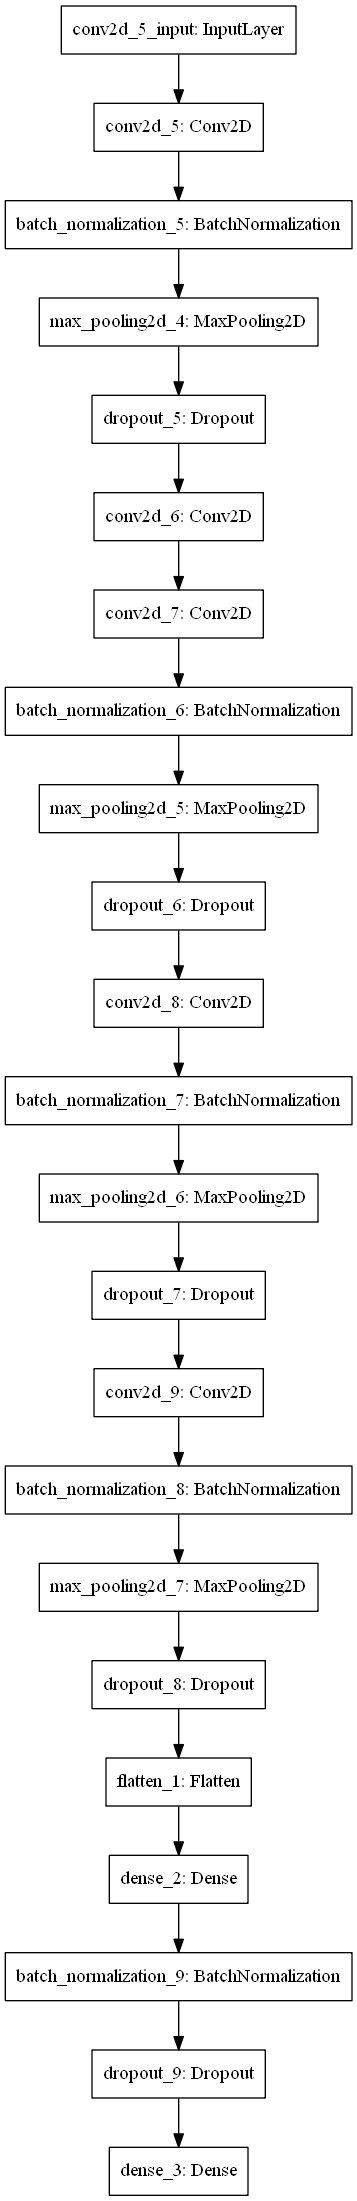

In [17]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
plot_model(model, to_file='Model_7_images.png')

In [18]:
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
110/110 [==============================] - 7s 64ms/step - loss: 11.1430 - accuracy: 0.0162 - val_loss: 10.2285 - val_accuracy: 0.0114
Epoch 2/100
110/110 [==============================] - 7s 62ms/step - loss: 10.4880 - accuracy: 0.0379 - val_loss: 10.3409 - val_accuracy: 0.0227
Epoch 3/100
110/110 [==============================] - 7s 62ms/step - loss: 9.9294 - accuracy: 0.0652 - val_loss: 10.2974 - val_accuracy: 0.0284
Epoch 4/100
110/110 [==============================] - 7s 63ms/step - loss: 9.3631 - accuracy: 0.1074 - val_loss: 10.3036 - val_accuracy: 0.0341
Epoch 5/100
110/110 [==============================] - 7s 63ms/step - loss: 8.9420 - accuracy: 0.1390 - val_loss: 9.7698 - val_accuracy: 0.0568
Epoch 6/100
110/110 [==============================] - 7s 63ms/step - loss: 8.5473 - accuracy: 0.1695 - val_loss: 8.9309 - val_accuracy: 0.1136
Epoch 7/100
110/110 [==============================] - 7s 62ms/step - loss: 8.1479 - accuracy: 0.2009 - val_loss: 8.3153 - val_acc

In [19]:
model.save('./model in 15.small dataset model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model in 15.small dataset model\assets


6/6 - 0s - loss: 0.7723 - accuracy: 0.8807


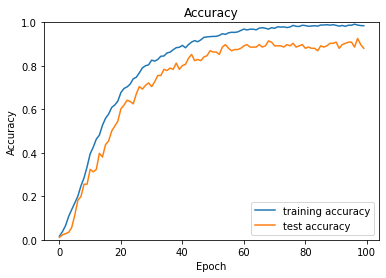

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

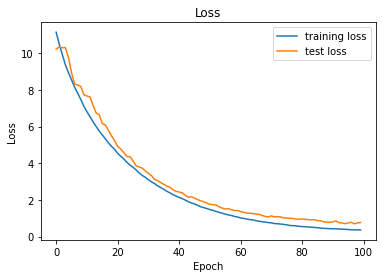

In [21]:
plt.title('Loss')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
# 存/取模型
# model.save('/model in 6.CNN with more databy pad and flip') 
# loaded_model = tf.keras.models.load_model('/tmp/model') 

In [ ]:
import matplotlib.pyplot as plot  # plot 可以視為畫布
import math

def show_feature_label_prediction(features, labels, predictions, indexList):
    num = len(indexList)

    plot.gcf().set_size_inches( 2*5, (2+0.4)*math.ceil(num/5) )

    loc = 0
    for i in indexList :
        loc += 1
        subp = plot.subplot( math.ceil(num/5), 5, loc )
        subp.imshow( features[i], cmap='binary' )

        if( len(predictions) > 0 ) :
            title = 'prediction = ' + str(predictions[i])
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') # predict result
            title += '\nlabel = ' + str(labels[i])
        else :
            title = 'label = ' + str(labels[i])

        subp.set_title( title, fontsize=12 )
        subp.set_xticks( [] )
        subp.set_yticks( [] )
    plot.show()

In [ ]:
def show_misprediction(features, labels, predictions, indexList):
    num = len(indexList)

    plot.gcf().set_size_inches( 2*5, (2+0.4)*math.ceil(num/5) )

    loc = 0
    for i in indexList :

        if(len(predictions)> 0) & (predictions[i]!=labels[i]):
            loc += 1
            subp = plot.subplot( math.ceil(num/5), 5, loc )
            subp.imshow(features[i], cmap='binary' )
            title = str(labels[i])
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') # predict result
            subp.set_title( title, fontsize=12 )
        else :
            continue
#             title = 'label = ' + str(labels[i])

        
        subp.set_xticks( [] )
        subp.set_yticks( [] )
    plot.show()

In [ ]:
re = []
prediction = model.predict_classes(test_images)
for i in range(len(test_labels_org)):
    if prediction[i]!=test_labels_org[i]:
        re.append(test_labels_org[i])
# sorted(re)

In [ ]:
sorted(test_labels_org)

In [ ]:
prediction = model.predict_classes(test_images)
show_feature_label_prediction(test_images, test_labels_org, prediction, range(0, len(test_labels_org)))

In [ ]:
np.unique(y)

In [ ]:
len(np.unique(y))

In [ ]:
prediction = model.predict_classes(test_images)
show_misprediction(test_images, test_labels_org, prediction, range(0, len(test_labels_org)))

In [ ]:
df = pd.DataFrame(data={'name': np.unique(list(name_list))})
df

In [ ]:
print(df.iloc[3][0])

In [ ]:
# print(df.iloc[0][0])
# print(df.iloc[94][0])
# print(df.iloc[17][0])
# print(df.iloc[10][0])
# print(df.iloc[26][0])
# print(df.iloc[53][0])
# print(df.iloc[43][0])
# print(df.iloc[60][0])
# print(df.iloc[48][0])
# print(df.iloc[25][0])
# print(df.iloc[92][0])
# print(df.iloc[85][0])
# print(df.iloc[23][0])
# print(df.iloc[19][0])
# print(df.iloc[38][0])
# print(df.iloc[75][0])
# print(df.iloc[22][0])
# print(df.iloc[63][0])
# print(df.iloc[81][0])
# print(df.iloc[62][0])
# print(df.iloc[14][0])
# print(df.iloc[33][0])
# print(df.iloc[15][0])
# print(df.iloc[86][0])
# print(df.iloc[3][0])

###### 